In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/fish.csv')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


Feature selection

In [ ]:
y = df[['Species']]
x =df.drop(['Species'],axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min = MinMaxScaler()
x = min.fit_transform(x)

In [ ]:
y.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

In [ ]:
x,y

(array([[1.46666667e-01, 3.09090909e-01, 3.58108108e-01, 5.68334049e-01,
         4.18978349e-01],
        [1.75757576e-01, 3.25454545e-01, 3.78378378e-01, 6.24055350e-01,
         4.59235453e-01],
        [2.06060606e-01, 3.29090909e-01, 3.76689189e-01, 6.18123353e-01,
         5.14278868e-01],
        [2.20000000e-01, 3.74545455e-01, 4.17229730e-01, 6.38566105e-01,
         4.80364795e-01],
        [2.60606061e-01, 3.74545455e-01, 4.25675676e-01, 6.21965801e-01,
         5.76003608e-01],
        [2.72727273e-01, 3.87272727e-01, 4.37500000e-01, 6.89202837e-01,
         5.46882048e-01],
        [3.03030303e-01, 3.87272727e-01, 4.34121622e-01, 7.22699465e-01,
         5.96371786e-01],
        [2.36363636e-01, 3.92727273e-01, 4.42567568e-01, 6.35083524e-01,
         5.13419035e-01],
        [2.72727273e-01, 3.92727273e-01, 4.44256757e-01, 7.12565153e-01,
         5.35098106e-01],
        [3.03030303e-01, 4.05454545e-01, 4.62837838e-01, 7.25433291e-01,
         5.51392648e-01],
        [2

Model Trainng

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

model = DecisionTreeClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.75

In [ ]:
model = KNeighborsClassifier()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8125

In [ ]:
model = GaussianNB()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.625

In [ ]:
model = SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.75

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = [DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]
scores = {} # Initialize scores as a dictionary
for model in models:
  model.fit(xtrain,ytrain)
  # Use type(model).__name__ instead of type(model)._name_ to get the class name
  scores[type(model).__name__] = model.score(xtest,ytest) * 100

In [ ]:
scores

{'DecisionTreeClassifier': 81.25,
 'KNeighborsClassifier': 81.25,
 'GaussianNB': 62.5,
 'SVC': 75.0}

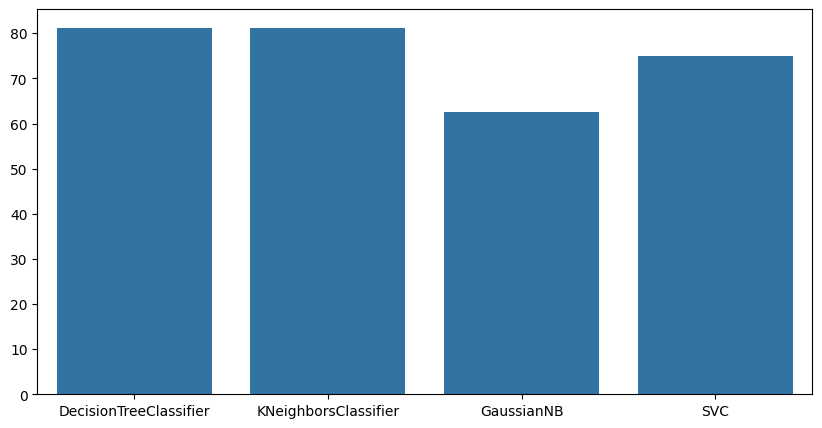

In [ ]:
import seaborn as sna
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sna.barplot(x=list(scores.keys()),y=list(scores.values()))
plt.show()

In [ ]:
from joblib import dump
dump(model,'fish.joblib')

['fish.joblib']